In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
train = pd.read_csv('C:\\Users\\kaate\\Downloads\\titanic\\train.csv')
test = pd.read_csv('C:\\Users\\kaate\\Downloads\\titanic\\test.csv')

поглянемо на датасети, візуалізуємо деяку інформацію

In [9]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [10]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [11]:
report = pandas_profiling.ProfileReport(train)
display(report)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
report2 = pandas_profiling.ProfileReport(test)
display(report2)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Бачимо що можна видалити колонки 'PassengerId', 'Name', 'Ticket', 'Cabin'. 
Потрібно також заповнити missing values для 'Age', 'Embarked', 'Fare'
І перевести категоріальні дані колонок 'Sex', 'Embarked'

In [13]:
# Спочатку розберемося з пропусками в даних 
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [14]:
# Викинемо непотріб
train.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
test.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

In [15]:
# Переведемо дані
train.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)
test.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

поглянемо на оновлені датасети

In [16]:
train.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500         0
1         1       1    1  38.0      1      0  71.2833         1
2         1       3    1  26.0      0      0   7.9250         0
3         1       1    1  35.0      1      0  53.1000         0
4         0       3    0  35.0      0      0   8.0500         0

In [17]:
test.head()

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  34.5      0      0   7.8292         2
1       3    1  47.0      1      0   7.0000         0
2       2    0  62.0      0      0   9.6875         2
3       3    0  27.0      0      0   8.6625         0
4       3    1  22.0      1      1  12.2875         0

для аналізу застосуємо GaussianMixture метод

In [24]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [47]:
X = train.drop('Survived', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
testing = scaler.fit_transform(test)

знайдемо оптимальну кількість кластерів

In [48]:
scores = []
for k in range(2, 11):
    gm = GaussianMixture(n_components=k, random_state=42)
    gm.fit(X)
    labels = gm.predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)

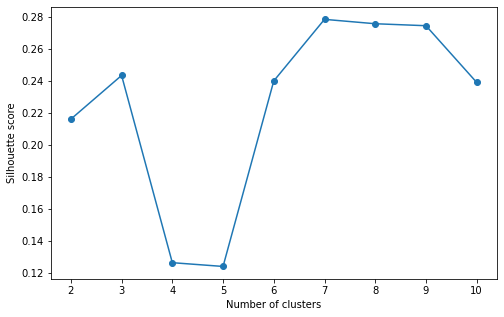

In [49]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

зважаючи на графік можна побачити, що 3 кластери є найкращим варіантом, тому його і застосуємо

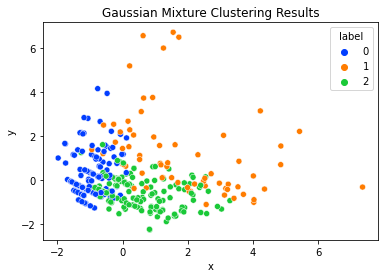

In [53]:
gm = GaussianMixture(n_components=3, random_state=100)
gm.fit(testing)
labels = gm.predict(testing)

pca = PCA(n_components=2)
pca.fit(testing)
testing_pca = pca.transform(testing)

df = pd.DataFrame({'x': testing_pca[:, 0], 'y': testing_pca[:, 1], 'label': labels})
sns.scatterplot(data=df, x='x', y='y', hue='label', palette='bright')
plt.title('Gaussian Mixture Clustering Results')
plt.show()
